In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
tickers = ["AAPL", "GOOGL", "AMZN", "TSLA", "META","MSFT"]

data_list = []
for ticker in tickers:
    df = yf.download(ticker, start="2010-01-01", end="2025-03-03")[["Close"]]
    df.columns = [ticker]
    data_list.append(df)

df_all = pd.concat(data_list, axis=1).dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_all)

def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 120
X, y = create_sequences(scaled_data, time_steps)

In [81]:
dates = df_all.index.tolist()

In [82]:
dates=dates[2754:].copy()

In [4]:
split = int(len(X) * 0.85)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [106]:
print(dates)
print(len(dates))

['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08', '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-13', '2023-05-14', '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-20', '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30', '2023-07-03', '2023-07-05', '2023-07-06', '2023-07-07', '2023-07-10', '2023-07-11', '2023-07-12', '2023-07-13', '2023-07-14', '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28', '2023-07-31', '2023-08-01', '2023-08-02', '2023-08-03', '2023

In [100]:
dates.sort()

In [105]:
dates.pop(13)
print(dates)

['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08', '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-13', '2023-05-14', '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-20', '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30', '2023-07-03', '2023-07-05', '2023-07-06', '2023-07-07', '2023-07-10', '2023-07-11', '2023-07-12', '2023-07-13', '2023-07-14', '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28', '2023-07-31', '2023-08-01', '2023-08-02', '2023-08-03', '2023

In [113]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(y_train.shape[1])
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=50, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - loss: 0.0245 - val_loss: 0.0230
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.0032 - val_loss: 0.0146
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0022 - val_loss: 0.0138
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0018 - val_loss: 0.0089
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 0.0017 - val_loss: 0.0074
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 0.0012 - val_loss: 0.0050
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - loss: 0.0010 - val_loss: 0.0033
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0010 - val_loss: 0.0037
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 9.1639e-04 - val_loss: 0.0033
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/ste

In [6]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [24]:
pred_list=test_predictions.tolist() #["AAPL", "GOOGL", "AMZN", "TSLA", "META", "MSFT"]

In [32]:
appl_arr_pred=np.array([pred_list[i][0] for i in range(465)])
googl_arr_pred=np.array([pred_list[i][1] for i in range(465)])
amzn_arr_pred=np.array([pred_list[i][2] for i in range(465)])
tsla_arr_pred=np.array([pred_list[i][3] for i in range(465)])
meta_arr_pred=np.array([pred_list[i][4] for i in range(465)])
msft_arr_pred=np.array([pred_list[i][5] for i in range(465)])

In [7]:
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, test_predictions)
r2 = r2_score(y_test_actual, test_predictions)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 626.00
Root Mean Squared Error (RMSE): 25.02
Mean Absolute Error (MAE): 16.79
R² Score: 0.84


In [90]:
len(dates),len(appl_arr_pred)

(460, 465)

In [112]:
import pandas as pd
import json


data = {
    "Date": dates,
    "Price": msft_arr_pred
}
df = pd.DataFrame(data)

json_data = df.to_dict(orient="records")

with open("date_price.json", "w") as f:
    json.dump(json_data, f, indent=4)

print(json.dumps(json_data, indent=4))


[
    {
        "Date": "2023-05-01",
        "Price": 275.5226745605469
    },
    {
        "Date": "2023-05-02",
        "Price": 275.46844482421875
    },
    {
        "Date": "2023-05-03",
        "Price": 275.0135803222656
    },
    {
        "Date": "2023-05-04",
        "Price": 275.00909423828125
    },
    {
        "Date": "2023-05-05",
        "Price": 275.9151916503906
    },
    {
        "Date": "2023-05-06",
        "Price": 277.414306640625
    },
    {
        "Date": "2023-05-07",
        "Price": 279.0510559082031
    },
    {
        "Date": "2023-05-08",
        "Price": 280.6463317871094
    },
    {
        "Date": "2023-05-09",
        "Price": 282.08587646484375
    },
    {
        "Date": "2023-05-10",
        "Price": 283.3536376953125
    },
    {
        "Date": "2023-05-11",
        "Price": 284.9936828613281
    },
    {
        "Date": "2023-05-12",
        "Price": 286.6962890625
    },
    {
        "Date": "2023-05-13",
        "Price": 288.175048

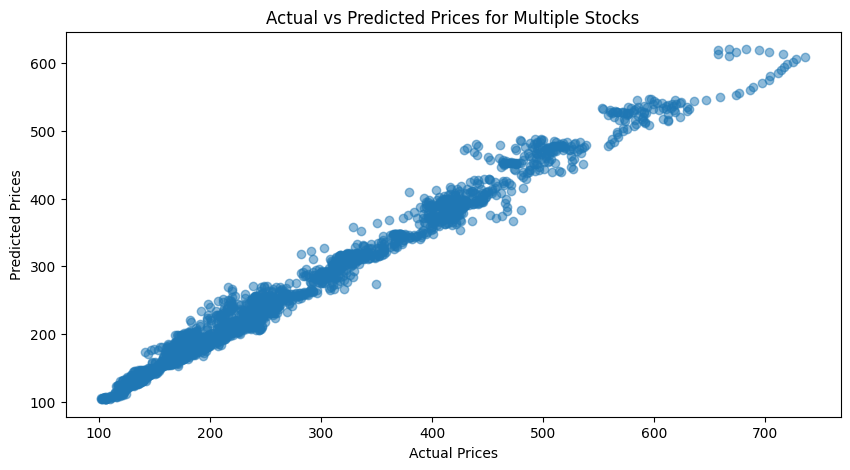

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_actual.flatten(), test_predictions.flatten(), alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices for Multiple Stocks")
plt.show()

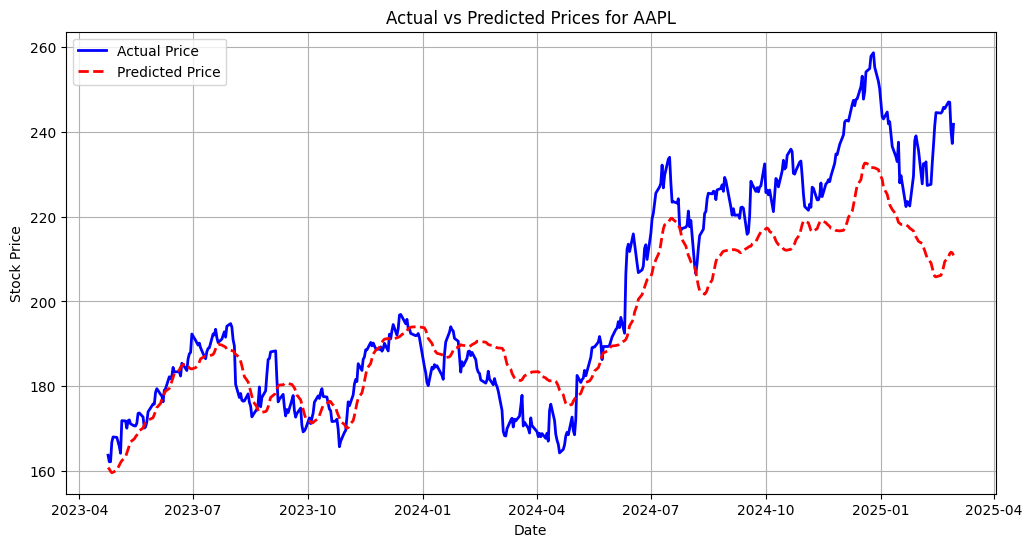

In [14]:
stock_index = 0 #["AAPL", "GOOGL", "AMZN", "TSLA", "META", "MSFT"]
actual_prices = y_test_actual[:, stock_index]
predicted_prices = test_predictions[:, stock_index]

dates = df_all.index[-len(y_test_actual):]
plt.figure(figsize=(12, 6))
plt.plot(dates, actual_prices, label="Actual Price", color='blue', linewidth=2)
plt.plot(dates, predicted_prices, label="Predicted Price", color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Actual vs Predicted Prices for {tickers[stock_index]}")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# def predict_future_prices(model, df, scaler, days=180, time_steps=60):
#     num_features_expected = scaler.scale_.shape[0]
#     if df.shape[1] != num_features_expected:
#         raise ValueError(f"DataFrame has {df.shape[1]} features but scaler expects {num_features_expected}. "
#                          "Please pass the same feature set used during training.")

#     last_sequence = df.iloc[-time_steps:].values
#     current_sequence = scaler.transform(last_sequence)
#     future_predictions = []
#     close_index = num_features_expected - 1
#     close_min = scaler.min_[close_index]
#     close_scale = scaler.scale_[close_index]

#     for _ in range(days):
#         X_input = current_sequence.reshape(1, time_steps, num_features_expected)
#         predicted_scaled = model.predict(X_input)[0, 0]
#         new_row = current_sequence[-1].copy()
#         new_row[close_index] = predicted_scaled
#         predicted_original = predicted_scaled / close_scale + close_min
#         future_predictions.append(predicted_original)
#         current_sequence = np.vstack([current_sequence[1:], new_row])


#     future_dates = pd.date_range(start=df.index[-1], periods=days+1, freq='B')[1:]
#     future_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})
#     future_df.set_index('Date', inplace=True)
#     future_df
#     return future_df

# def plot_future_predictions(df, future_df, stock_ticker):
#     plt.figure(figsize=(12, 5))

#     if df.shape[1] > 1 and 'Close' in df.columns:
#         actual = df['Close']
#     else:
#         actual = df.iloc[:, 0]

#     plt.plot(df.index[-100:], actual.iloc[-100:], label="Actual Price", color="blue")
#     plt.plot(future_df.index, future_df["Predicted Price"], linestyle="dashed", color="red", label="Predicted Price")
#     plt.xlabel("Date")
#     plt.ylabel("Stock Price (USD)")
#     plt.title(f"Predicted Stock Prices for {stock_ticker} (Next 6 Months)")
#     plt.legend()
#     plt.grid(True)
#     plt.show()


# future_prices = predict_future_prices(model, df_all, scaler, 50, 200)
# plot_future_predictions(df_all, future_prices, "AAPL")
# print(future_prices)
